# Examen de datos del mundo real

Debido a la complejidad de los datos del "mundo real", hay que inspeccionar los datos sin procesar para detectar problemas antes de utilizarlos.

Por ello, el procedimiento recomendado es inspeccionar los datos sin procesar y procesarlos antes de utilizarlos, lo que reduce los errores o problemas, normalmente eliminando los puntos de datos erróneos o modificando los datos para que sean más útiles.

Recuerde que los datos del mundo real siempre tendrán problemas, pero esto suele ser un problema superable. Recuerde:

- Compruebe los valores que faltan y los datos registrados de forma incorrecta.
- Considere la posibilidad de eliminar valores atípicos obvios.
- Considere qué factores del mundo real podrían afectar al análisis y vea si el tamaño del conjunto de datos es lo suficientemente grande como para controlarlos.
- Compruebe si los datos sin procesar están sesgados y considere sus opciones para corregirlos, si se encuentran.

## Datos con Python
Vamos a comparar datos en una manera mas compleja.
## Distribuciones de datos

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\dtscj\AppData\Local\Temp\ipykernel_3464\2995570423.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


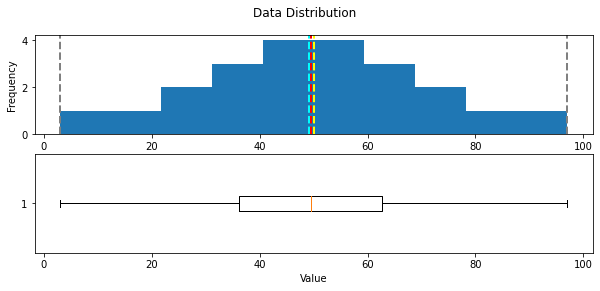

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file: !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

# Print the result out into this notebook
print(df_students)

# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,                                                                                          mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

Vamos a ver ahora como está distribuida la informacion sobre las horas de estudio. 

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\dtscj\AppData\Local\Temp\ipykernel_3464\2995570423.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


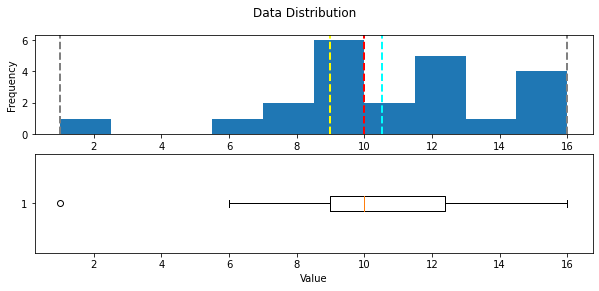

In [2]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

Las datos ahora se distribuyen de manera distinta a las calificaciones. Notemos ahora que tenemos la presencia de outliers.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\dtscj\AppData\Local\Temp\ipykernel_3464\2995570423.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


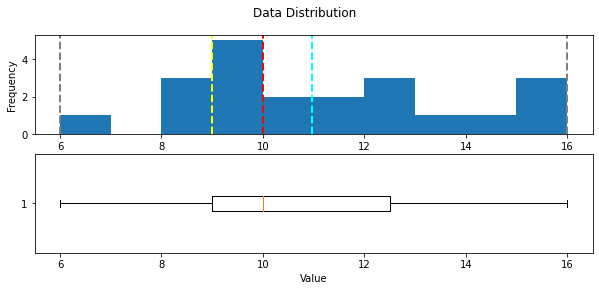

In [3]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

Solamente por fine académicos camos a tratar a 1 como un valor atipoco y excluirlo. Es mas complicado dejar fuera valores atipicos sin una buena justificación. En este caso la muestra es muy pequeña, tomar a 100 estudiantes quizas se vea que hay mas personas que estudian solo una hora a la semana. 

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\dtscj\AppData\Local\Temp\ipykernel_3464\2995570423.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


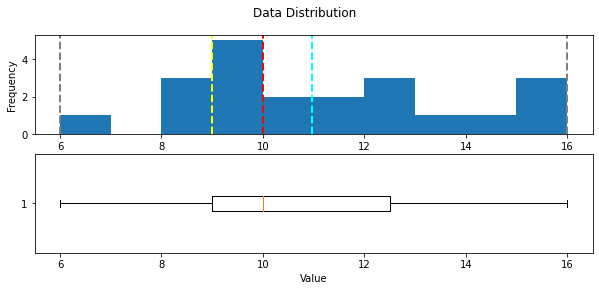

In [4]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

Tip: You can also eliminate outliers at the upper end of the distribution by defining a threshold at a high percentile value - for example, you could use the quantile function to find the 0.99 percentile below which 99% of the data reside.